In [1]:
import collections

import pandas
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
!pwd

/Users/nurrizkyimani/DataspellProjects/flood-jsc-yli


In [138]:
from collections import defaultdict

rekap_yr_dict = defaultdict()

for yr in range(2013,2021):
    path = "dataset/data-rekapitulasi/data-rekapitulasi-kejadian-banjir-tahun-{}.csv".format(yr)
    data_rekap = pd.read_csv(path)
    rekap_yr_dict[yr] = data_rekap

In [139]:
rc : pd.DataFrame = rekap_yr_dict[2013]
len(rc.columns)

15

In [140]:
for yr in range(2013, 2021):
    rekap_yr : pd.DataFrame = rekap_yr_dict[yr]
    # print(len(rekap_yr.columns))
    # rekap_yr['tahun'] = yr

In [141]:
all_rekap = pd.concat(rekap_yr_dict)

In [142]:
all_rekap

bulan  kecamatan  kelurahan rata_rata_ketinggian_air lama_genangan  \
2013 0       1       35.0      124.0               10 - 400            15.0   
     1       2       15.0       34.0               10 - 175             8.0   
     2       3        5.0        9.0               10 - 250             2.0   
     3       4       10.0       16.0               10 - 100             4.0   
     4       5       10.0       16.0                0 - 160             3.0   
...        ...        ...        ...                      ...           ...   
2020 7       8       10.0       12.0             10 s.d 80 cm        1 hari   
     8       9       16.0       28.0            10 s.d 130 cm  1 s.d 2 hari   
     9      10       29.0       72.0            10 s.d 180 cm  1 s.d 2 hari   
     10     11       16.0       27.0             10 s.d 60 cm  1 s.d 2 hari   
     11     12        7.0        9.0             10 s.d 80 cm        1 hari   

         rw_terdampak kk_terdampak jiwa_terdampak  korban_meninggal  \
2013 0         2414.0     506164.0      1226487.0              38.0   
     1          207.0      19177.0        46865.0               0.0   
     2           68.0       9215.0        27020.0               0.0   
     3           66.0       6004.0        15060.0               0.0   
     4          139.0       4740.0        18481.0               0.0   
...               ...          ...            ...               ...   
2020 7           20.0            0              0               0.0   
     8           65.0          414           1300               0.0   
     9          170.0         1933           6250               0.0   
     10          54.0            0              0               0.0   
     11          18.0          250            827               0.0   

         korban_hilang  korban_luka_berat  korban_luka_ringan  \
2013 0             0.0                0.0                 0.0   
     1             0.0                0.0                 0.0   
     2             0.0                0.0                 0.0   
     3             0.0                0.0                 0.0   
     4             0.0                0.0                 0.0   
...                ...                ...                 ...   
2020 7             0.0                0.0                 0.0   
     8             0.0                0.0                 0.0   
     9             0.0                0.0                 0.0   
     10            0.0                0.0                 0.0   
     11            0.0                0.0                 0.0   

         jumlah_jiwa_pengungsi_tertinggi  jumlah_tempat_pengungsian  \
2013 0                           83554.0                     1115.0   
     1                             740.0                       21.0   
     2                            2406.0                       34.0   
     3                             318.0                        7.0   
     4                            1245.0                       42.0   
...                                  ...                        ...   
2020 7                               0.0                        0.0   
     8                             104.0                        5.0   
     9                             675.0                       12.0   
     10                              0.0                        0.0   
     11                              0.0                        0.0   

        jumlah_nilai_kerugian  
2013 0                      0  
     1                      0  
     2                      0  
     3                      0  
     4                      0  
...                       ...  
2020 7                    n.a  
     8                    n.a  
     9                    n.a  
     10                   n.a  
     11                   n.a  

[95 rows x 15 columns]

In [143]:
all_rekap.index[0][1]
len(all_rekap.columns)

15

In [144]:
all_rekap.reset_index(inplace=True)
# df = df.rename(columns = {'index':'new column name'})

In [145]:
all_rekap.drop('level_1', axis=1, inplace= True)

In [146]:
# all_rekap.rename({'level_0' : 'tahun'}, axis='columns')
all_rekap = all_rekap.rename(columns = {'level_0':'tahun'})

In [147]:
all_rekap.dtypes

tahun                                int64
bulan                                int64
kecamatan                          float64
kelurahan                          float64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                       float64
kk_terdampak                        object
jiwa_terdampak                      object
korban_meninggal                   float64
korban_hilang                      float64
korban_luka_berat                  float64
korban_luka_ringan                 float64
jumlah_jiwa_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian          float64
jumlah_nilai_kerugian               object
dtype: object

In [148]:
import numpy as np
all_rekap = all_rekap.fillna(0)

In [149]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2013,1,35.0,124.0,10 - 400,15.0,2414.0,506164.0,1226487.0,38.0,0.0,0.0,0.0,83554.0,1115.0,0
1,2013,2,15.0,34.0,10 - 175,8.0,207.0,19177.0,46865.0,0.0,0.0,0.0,0.0,740.0,21.0,0
2,2013,3,5.0,9.0,10 - 250,2.0,68.0,9215.0,27020.0,0.0,0.0,0.0,0.0,2406.0,34.0,0
3,2013,4,10.0,16.0,10 - 100,4.0,66.0,6004.0,15060.0,0.0,0.0,0.0,0.0,318.0,7.0,0
4,2013,5,10.0,16.0,0 - 160,3.0,139.0,4740.0,18481.0,0.0,0.0,0.0,0.0,1245.0,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10.0,12.0,10 s.d 80 cm,1 hari,20.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,n.a
91,2020,9,16.0,28.0,10 s.d 130 cm,1 s.d 2 hari,65.0,414,1300,0.0,0.0,0.0,0.0,104.0,5.0,n.a
92,2020,10,29.0,72.0,10 s.d 180 cm,1 s.d 2 hari,170.0,1933,6250,0.0,0.0,0.0,0.0,675.0,12.0,n.a
93,2020,11,16.0,27.0,10 s.d 60 cm,1 s.d 2 hari,54.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,n.a


In [171]:
all_rekap = all_rekap.astype({
    "kecamatan": int,
    "kelurahan": int,

})

# "rw_terdampak": int,
# "kk_terdampak":  int,
# "jiwa_terdampak":  int,
# "korban_meninggal":  int,
# "korban_hilang":  int,
# "korban_luka_ringan":  int,
# "korban_luka_berat":  int,
# "jumlah_jiwa_pengungsi_tertinggi":  int,
# "jumlah_nilai_kerugian":  int,
# "jumlah_tempat_pengungsian":  int,

all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype('int64')
all_rekap['korban_meninggal'] = all_rekap['korban_meninggal'].astype('int64')
all_rekap['korban_hilang']  = all_rekap['korban_hilang'].astype('int64')

In [183]:
# all_rekap.replace('n.a', 0)
# all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].fillna(0)
# all_rekap['kk_terdampak'].astype('int64')

all_rekap['jiwa_terdampak'] = all_rekap['jiwa_terdampak']

# all_rekap['jiwa_terdampak'].astype('int64')
# all_rekap


AttributeError: 'Series' object has no attribute 'to_numeric'

In [196]:
all_rekap.dtypes

tahun                               int64
bulan                               int64
kecamatan                           int64
kelurahan                           int64
rata_rata_ketinggian_air           object
lama_genangan                      object
rw_terdampak                        int64
kk_terdampak                       object
jiwa_terdampak                     object
korban_meninggal                    int64
korban_hilang                       int64
korban_luka_berat                   int64
korban_luka_ringan                  int64
jumlah_jiwa_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian           int64
dtype: object

In [189]:
all_rekap.drop('jumlah_nilai_kerugian', axis=1, inplace= True)

In [195]:
all_rekap['jumlah_tempat_pengungsian']  = all_rekap['jumlah_tempat_pengungsian'].astype('int64')
all_rekap['jumlah_jiwa_pengungsi_tertinggi']  = all_rekap['jumlah_jiwa_pengungsi_tertinggi'].astype('int64')
all_rekap['korban_luka_ringan']  = all_rekap['korban_luka_ringan'].astype('int64')
all_rekap['korban_luka_berat']  = all_rekap['korban_luka_berat'].astype('int64')

In [198]:
all_rekap.dtypes

tahun                               int64
bulan                               int64
kecamatan                           int64
kelurahan                           int64
rata_rata_ketinggian_air           object
lama_genangan                      object
rw_terdampak                        int64
kk_terdampak                       object
jiwa_terdampak                     object
korban_meninggal                    int64
korban_hilang                       int64
korban_luka_berat                   int64
korban_luka_ringan                  int64
jumlah_jiwa_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian           int64
dtype: object

In [204]:
df_2020= all_rekap[all_rekap['tahun'] == 2020]

In [205]:
df_2020

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
83,2020,1,35,151,10 s.d 350 cm,4 hari,390,22148,83406,19,0,0,0,36445,269
84,2020,2,42,167,5 s.d 200 cm,1 s.d 2 hari,581,12551,43464,6,0,0,0,13808,119
85,2020,3,24,46,5 s.d 160 cm,1 s.d 2 hari,104,3057,9687,0,0,0,0,453,14
86,2020,4,21,50,10 s.d 130 cm,1 s.d 2 hari,106,1059,2966,0,0,0,0,75,2
87,2020,5,12,23,10 s.d 200 cm,1 s.d 2 hari,47,891,3117,0,0,0,0,213,6
88,2020,6,9,16,5 s.d 120 cm,1 hari,46,80,320,0,0,0,0,320,7
89,2020,7,2,2,20 s.d 50 cm,1 hari,4,0,0,0,0,0,0,0,0
90,2020,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12


In [214]:
test = np.random.standard_normal(50).cumsum()

print(len(test))
print(test)

50
[ 1.57544432  1.68056893  0.76430419  1.02418072  2.06999369  0.90060764
  1.98883826  0.65025043 -1.19211371 -1.96893897 -2.20918774 -0.84471896
 -0.0468609   0.72477595  0.90943101  1.71819019  2.22453096  2.72208264
  4.12424199  4.56367597  2.93374902  2.20988579  2.33153081  1.65114343
  1.34572903  1.41418983  2.31747418  1.33083224  1.08132304  1.27975152
  0.81222951  0.02415172  0.03742212  1.03548764  1.05423022  0.94261062
 -0.93631012 -0.21228401  0.05837874  1.31577539  2.20891949  1.3014381
  0.22903373 -1.57291331 -0.86590203 -0.42234895  0.8199103   2.72692168
  1.55459386  0.61302113]


In [222]:
df_2020_rw = df_2020['rw_terdampak']
df_2020_bulan = df_2020['bulan']

[]

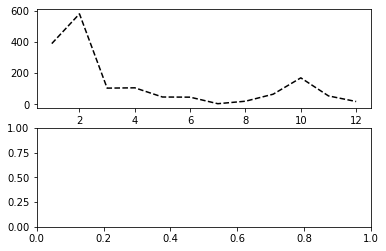

In [237]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(df_2020_bulan,df_2020_rw,  color="black", linestyle="dashed")
ax1.plot()

ax2

In [238]:
ax.plot(x, y, linestyle="--", color="green")

NameError: name 'ax' is not defined

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_28709/121584360.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


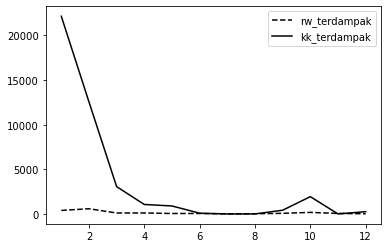

In [248]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_2020_bulan, df_2020_rw, color="black",linestyle="dashed", label="rw_terdampak");

df_2020_kk = df_2020['kk_terdampak']
ax1 = fig.add_subplot()
ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

ax.legend()

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_28709/890962830.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


ModuleNotFoundError: No module named 'seaborn'

In [251]:
!conda install seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/nurrizkyimani/.conda/envs/workspace

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py38hecd8cb5_0         154 KB
    fftw-3.3.9                 |       h9ed2024_1         2.0 MB
    libgfortran-5.0.0          |11_2_0_h246ff09_26          21 KB
    libgfortran5-11.2.0        |      h246ff09_26         1.3 MB
    scipy-1.7.3                |   py38h214d14d_2        15.5 MB
    ------------------------------------------------------------
                                           Total:        19.0 MB

The following NEW packages will be INSTALLED:

  fftw       

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


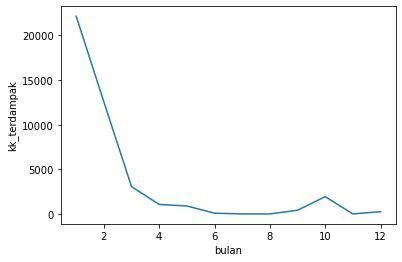

In [252]:
# df_2020_kk = df_2020['kk_terdampak']
# ax1 = fig.add_subplot()
# ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

import seaborn as sns
sns.lineplot(df_2020_bulan, df_2020_kk)

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


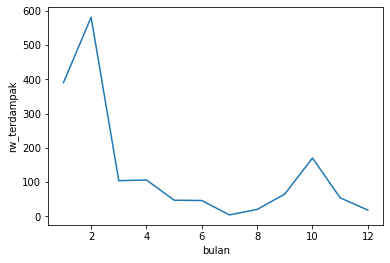

In [253]:
sns.lineplot(df_2020_bulan, df_2020_rw)

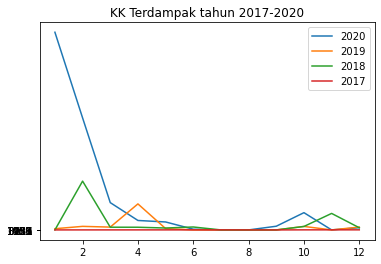

In [266]:
import matplotlib.pyplot as plt

all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['kk_terdampak'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['kk_terdampak'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['kk_terdampak'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['kk_terdampak'], label = "2017")
plt.title("KK Terdampak tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [279]:
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s.d 2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 hari', 1)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('4 hari', 4)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)


all_rekap['lama_genangan'].iloc[59] = 2
all_rekap['lama_genangan'].iloc[60] = 6

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].astype(int)

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_28709/790911078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rekap['lama_genangan'].iloc[59] = 2
/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_28709/790911078.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rekap['lama_genangan'].iloc[60] = 6


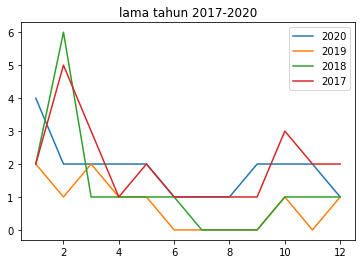

In [280]:
import matplotlib.pyplot as plt

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['lama_genangan'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['lama_genangan'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['lama_genangan'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['lama_genangan'], label = "2017")
plt.title("lama tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [281]:
all_rekap.columns

Index(['tahun', 'bulan', 'kecamatan', 'kelurahan', 'rata_rata_ketinggian_air',
       'lama_genangan', 'rw_terdampak', 'kk_terdampak', 'jiwa_terdampak',
       'korban_meninggal', 'korban_hilang', 'korban_luka_berat',
       'korban_luka_ringan', 'jumlah_jiwa_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian'],
      dtype='object')

In [282]:
all_rekap["rata_rata_ketinggian_air"]

0        10 - 400  
1        10 - 175  
2        10 - 250  
3        10 - 100  
4         0 - 160  
          ...      
90     10 s.d 80 cm
91    10 s.d 130 cm
92    10 s.d 180 cm
93     10 s.d 60 cm
94     10 s.d 80 cm
Name: rata_rata_ketinggian_air, Length: 95, dtype: object